<a href="https://colab.research.google.com/github/gudals6676/Deep_Learning/blob/main/05_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 패션 이미지 데이터(10가지)를 분류하는 모델을 만들어보자!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 케라스에서 지원하는 딥러닝 학습용 손글씨 데이터를 임포트
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1979167349879360190, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18264483523382632419
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


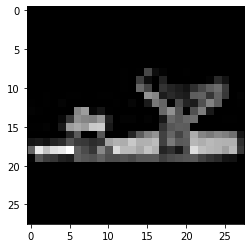

In [ ]:
plt.imshow(X_train[59999], cmap='gray')

In [ ]:
print(y_train)

[9 0 0 ... 3 0 5]


직접 처음부터 모든 단계를 설정해보자!

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [ ]:
# -1은 60000을 제외한 나머지 값들을 다 곱해서 일렬로 펴줌
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [ ]:
# 이미지는 픽셀 하나하나가 하나의 특성으로 인식됨(28*28=784)
X_train.shape, X_test.shape, y_train_one_hot.shape

((60000, 784), (10000, 784), (60000, 10))

In [ ]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense, Flatten   # 신경망의 층을 구성

In [ ]:
from tensorflow.python.keras.engine import input_layer
model = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model.add(Flatten(input_shape=(28, 28))) # 즉 리쉐입이 필요가 없음


# 중간층
model.add(Dense(300, activation="sigmoid"))  # 하나의 층
model.add(Dense(600, activation="relu"))  # 하나의 층
model.add(Dense(300, activation="relu"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_21 (Dense)             (None, 600)               180600    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                3010      
Total params: 599,410
Trainable params: 599,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
model.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h1 = model.fit(X_train, y_train_one_hot, epochs=100, verbose = 1)
#verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력X, 1: bar형태(디폴트), 2:bar가 없는 형태로 출력)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8495 - acc: 0.6633
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7890 - acc: 0.6889
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7375 - acc: 0.7073
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7264 - acc: 0.7110
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6700 - acc: 0.7327
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6869 - acc: 0.7318
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6770 - acc: 0.7338
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6830 - acc: 0.7340
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6548 - acc: 0.7432
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6772 - acc: 0.7323
Epoch 11/100
1875/1

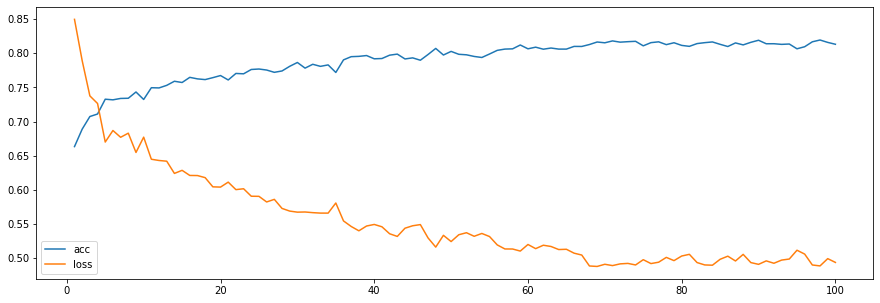

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),
         h1.history['acc'],
         label='acc'
         )

plt.plot(range(1, 101, 1),
         h1.history['loss'],
         label='loss'
         )

plt.legend()
plt.show()

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.5190 - acc: 0.8024


[0.5189645290374756, 0.8023999929428101]

In [ ]:
# 1. 신경망 구조 설계
md = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation : 활성화 함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
md.add(Dense(300, input_dim= 784, activation= "sigmoid"))

# 중간층
md.add(Dense(600, activation="relu"))  # 하나의 층
md.add(Dense(300, activation="relu"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md.add(Dense(10, activation="softmax"))

md.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 600)               180600    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3010      
Total params: 599,410
Trainable params: 599,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h = md.fit(X_train, y_train_one_hot, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8574 - acc: 0.6639
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8170 - acc: 0.6765
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7729 - acc: 0.7032
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7371 - acc: 0.7135
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7490 - acc: 0.7104
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7145 - acc: 0.7230
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6984 - acc: 0.7262
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6891 - acc: 0.7341
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6582 - acc: 0.7440
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6451 - acc: 0.7467
Epoch 11/100
1875/1

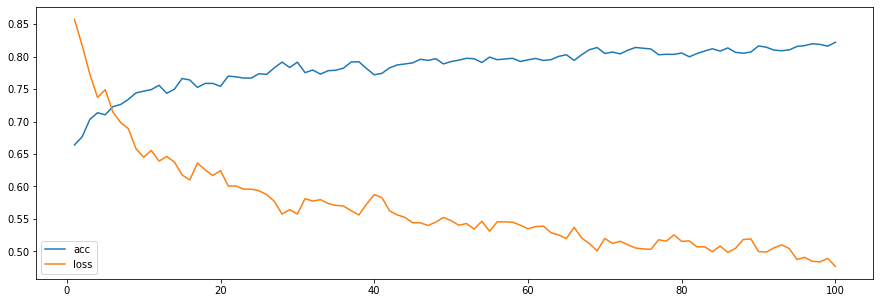

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),
         h.history['acc'],
         label='acc'
         )
plt.plot(range(1, 101, 1),
         h.history['loss'],
         label='loss'
         )
plt.legend()
plt.show()

In [ ]:
# 모델 평가
md.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.5335 - acc: 0.8115


[0.5334957838058472, 0.8115000128746033]

In [ ]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train,  #문제
                                                    y_train_one_hot, #정답
                                                    random_state=3
                                                   )